### Часть 1. Загрузка и изучение данных:
* [1. Подключение необходимых библиотек, импортирование функций, инициализация констант.](#fp.1-bullet)
* [2. Загрузка данных.](#fp.2-bullet)
* [3. Изучение данных.](#fp.3-bullet)
* [4. Вывод.](#fp.4-bullet)

### Часть 2. Анализ и подготовка данных:
* [5. Объединение таблиц.](#fp.5-bullet)
* [6. Приведение столбцов к нужному типу.](#fp.6-bullet)
* [7. Добавление новых признаков.](#fp.7-bullet)
* [8. Анализ данных и избавление от ненужных для обучения признаков.](#fp.8-bullet)
* [9. Вывод.](#fp.9-bullet)
    
### Часть 3. Подбор и обучение оптимальных моделей.
* [10. Обучение модели логистической регрессии.](#fp.10-bullet)
* [11. Подбор параметров и обучение модели градиентного бустинга.](#fp.11-bullet)
* [12. Вывод.](#fp.12-bullet)
    
### Часть 4. Проверка моделей на тестовой выборке.
* [13. Проверка наилучшей модели логистической регрессии на тестовой выборке.](#fp.13-bullet)
* [14. Проверка наилучшей модели лградиентного бустинга на тестовой выборке.](#fp.14-bullet)
    
### Часть 5. Обший вывод:
* [15. Общий вывод.](#fp.15-bullet)

## Часть 1. Загрузка и изучение данных. 

<a id='fp.1-bullet'></a> 
### 1. Подключение необходимых библиотек, импортирование функций, инициализация констант. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import time
import warnings

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.utils import shuffle
from sklearn.compose import TransformedTargetRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import FunctionTransformer
from sklearn.pipeline import FeatureUnion
from sklearn.model_selection import cross_val_score
from catboost import CatBoostClassifier

warnings.filterwarnings("ignore")
pd.options.mode.chained_assignment = None

RANDOM_STATE = 190380

<a id='fp.2-bullet'></a> 
### 2. Загрузка данных. 

Функция загрузки данных

In [2]:
def load_data(is_local=True):
    path = {True: './datasets/', False: '/datasets/'}
    return (
        pd.read_csv(f'{path[is_local]}contract.csv'), 
        pd.read_csv(f'{path[is_local]}internet.csv'), 
        pd.read_csv(f'{path[is_local]}personal.csv'),
        pd.read_csv(f'{path[is_local]}phone.csv')
    )

In [3]:
try:
    d_contact, d_internet, d_personal, d_phone = load_data(False)
except:
    d_contact, d_internet, d_personal, d_phone = load_data(True)

<a id='fp.3-bullet'></a> 
### 3. Изучение данных. 

##### Изучим таблицу *contact*:

In [4]:
d_contact.info()
display(d_contact.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   BeginDate         7043 non-null   object 
 2   EndDate           7043 non-null   object 
 3   Type              7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
dtypes: float64(1), object(7)
memory usage: 440.3+ KB


,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,1889.5
2,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,108.15
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1840.75
4,9237-HQITU,2019-09-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,70.70,151.65


Таблица с основными данными по клиентам.
Поля таблицы:

    customerID - уникальный код клиентв (строка)
    BeginDate - дата начала пользования услугами (строка)
    EndDate - дата окончания пользования услугами (строка)
    Type -  тип оплаты: ежемесячный, годовой и тд (строка)
    PaperlessBilling - безналичный расчет (строка)
    PaymentMethod - способ оплаты (строка)
    MonthlyCharges - ежемесячные траты на услуги (флоат)
    TotalCharges - всего потрачено денег на услуги (строка)

Всего 7043 записей, пропусков нету.

##### Изучим таблицу *internet*:

In [5]:
d_internet.info()
display(d_internet.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5517 entries, 0 to 5516
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customerID        5517 non-null   object
 1   InternetService   5517 non-null   object
 2   OnlineSecurity    5517 non-null   object
 3   OnlineBackup      5517 non-null   object
 4   DeviceProtection  5517 non-null   object
 5   TechSupport       5517 non-null   object
 6   StreamingTV       5517 non-null   object
 7   StreamingMovies   5517 non-null   object
dtypes: object(8)
memory usage: 344.9+ KB


,customerID,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,Fiber optic,No,No,No,No,No,No


Таблица содержит информацию по услуге интернет. Поля таблицы:

    customerID - уникальный код клиентв (строка)
    InternetService - тип интернет соединения (строка)
    OnlineSecurity - доп. услуга (строка)
    OnlineBackup - доп. услуга (строка)
    DeviceProtection - доп. услуга (строка)
    TechSupport - доп. услуга (строка)
    StreamingTV - доп. услуга (строка)
    StreamingMovies - доп. услуга (строка)

Всего 5517 записей. Пропусков нету.

##### Изучим таблицу *personal*:

In [6]:
d_personal.info()
display(d_personal.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     7043 non-null   object
 1   gender         7043 non-null   object
 2   SeniorCitizen  7043 non-null   int64 
 3   Partner        7043 non-null   object
 4   Dependents     7043 non-null   object
dtypes: int64(1), object(4)
memory usage: 275.2+ KB


,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No


Таблица содержит персональные данные клиентов. Поля таблицы:

    customerID - уникальный код клиентв (строка)
    gender - пол (строка)
    SeniorCitizen -  наличие пенсионного статуса по возрасту (целое)
    Partner - наличие супруга(и) (строка)
    Dependents -  наличие иждивенцев (строка)

Всего 7043 записей. Пропусков нету.

##### Изучим таблицу *phone*:

In [7]:
d_phone.info()
display(d_phone.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6361 entries, 0 to 6360
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     6361 non-null   object
 1   MultipleLines  6361 non-null   object
dtypes: object(2)
memory usage: 99.5+ KB


,customerID,MultipleLines
0,5575-GNVDE,No
1,3668-QPYBK,No
2,9237-HQITU,No
3,9305-CDSKC,Yes
4,1452-KIOVK,Yes


Таблица содержит информацию по услуги телефонной связи. Поля таблицы:

    customerID - уникальный код клиентв (строка)
    MultipleLines - наличие возможности ведения параллельных линий во время звонка (строка)

Всего 6361 записей. Пропусков нету.

<a id='fp.4-bullet'></a> 
### 4. Вывод. 

Предварительное изучение данных показало большое количество полей с несоответствующими типами данных. Так же видно, что не каждый абонент пользовался обеими услугами (телефон, интернет). В данных отсутствуют пропуски. 

## Часть 2. Анализ и подготовка данных. 

<a id='fp.5-bullet'></a> 
### 5. Объединение таблиц. 

Объединим таблицы по customerID сделав из него индекс.

In [8]:
data = d_contact.set_index('customerID').join([d_personal.set_index('customerID'), d_internet.set_index('customerID'), d_phone.set_index('customerID')])

Результат:

In [9]:
data.info()
display(data.head())

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   BeginDate         7043 non-null   object 
 1   EndDate           7043 non-null   object 
 2   Type              7043 non-null   object 
 3   PaperlessBilling  7043 non-null   object 
 4   PaymentMethod     7043 non-null   object 
 5   MonthlyCharges    7043 non-null   float64
 6   TotalCharges      7043 non-null   object 
 7   gender            7043 non-null   object 
 8   SeniorCitizen     7043 non-null   int64  
 9   Partner           7043 non-null   object 
 10  Dependents        7043 non-null   object 
 11  InternetService   5517 non-null   object 
 12  OnlineSecurity    5517 non-null   object 
 13  OnlineBackup      5517 non-null   object 
 14  DeviceProtection  5517 non-null   object 
 15  TechSupport       5517 non-null   object 
 16  StreamingTV       5517 non-null 

,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,gender,SeniorCitizen,Partner,Dependents,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,MultipleLines
customerID,,,,,,,,,,,,,,,,,,,
7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.85,Female,0,Yes,No,DSL,No,Yes,No,No,No,No,NaN
5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,1889.5,Male,0,No,No,DSL,Yes,No,Yes,No,No,No,No
3668-QPYBK,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,108.15,Male,0,No,No,DSL,Yes,Yes,No,No,No,No,No
7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1840.75,Male,0,No,No,DSL,Yes,No,Yes,Yes,No,No,NaN
9237-HQITU,2019-09-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,70.70,151.65,Female,0,No,No,Fiber optic,No,No,No,No,No,No,No


Получился датафрейм с 19 признаками один в некоторых есть пропуски, а типы данных не соответствуют реальности.

<a id='fp.6-bullet'></a> 
### 6.  Приведение столбцов к нужному типу. 

Прежде чем привести столбцы к нужным типам надо избавиться от пропусков.

Пропуски появились в тех столбцах, ктоорые при объединение оказались услугой, которой абонент не пользуется. По этому вместо пропусков целесообразно выставить значение *No*, но добавим 2 дополнительных признака *use_internet* и *use_phone*, а в столбце *InternetService* пропуски заменим на *not use*.

In [10]:
data['InternetService'] = data['InternetService'].fillna('not_use')
data['use_internet'] = data.OnlineSecurity.fillna(0).replace(['Yes', 'No'], 1)
data['use_phone'] = data.MultipleLines.fillna(0).replace(['Yes', 'No'], 1)

In [11]:
data = data.fillna('No')

Приведём к типу datetime столбец *BeginDate*:

In [12]:
data.BeginDate = pd.to_datetime(data.BeginDate, format='%Y-%m-%d')

Приведём к типу *float* столбцы *MonthlyCharges* и *TotalCharges*

In [13]:
data.MonthlyCharges = data.MonthlyCharges.astype('float')

В столбце *TotalCharges* есть не числовые значения. Это те клиенты, которые не внесли ещё ни одного платежа. Заменим их на 0 и приведём столбец к *float*.

In [14]:
data.TotalCharges = data.TotalCharges.replace(' ', '0')
data.TotalCharges = data.TotalCharges.astype('float')

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   BeginDate         7043 non-null   datetime64[ns]
 1   EndDate           7043 non-null   object        
 2   Type              7043 non-null   object        
 3   PaperlessBilling  7043 non-null   object        
 4   PaymentMethod     7043 non-null   object        
 5   MonthlyCharges    7043 non-null   float64       
 6   TotalCharges      7043 non-null   float64       
 7   gender            7043 non-null   object        
 8   SeniorCitizen     7043 non-null   int64         
 9   Partner           7043 non-null   object        
 10  Dependents        7043 non-null   object        
 11  InternetService   7043 non-null   object        
 12  OnlineSecurity    7043 non-null   object        
 13  OnlineBackup      7043 non-null   object        
 14  DeviceProtecti

In [16]:
data.head()

,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,gender,SeniorCitizen,Partner,...,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,MultipleLines,use_internet,use_phone
customerID,,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.85,Female,0,Yes,...,DSL,No,Yes,No,No,No,No,No,1,0
5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,1889.50,Male,0,No,...,DSL,Yes,No,Yes,No,No,No,No,1,1
3668-QPYBK,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,108.15,Male,0,No,...,DSL,Yes,Yes,No,No,No,No,No,1,1
7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1840.75,Male,0,No,...,DSL,Yes,No,Yes,Yes,No,No,No,1,0
9237-HQITU,2019-09-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,70.70,151.65,Female,0,No,...,Fiber optic,No,No,No,No,No,No,No,1,1


Проверим значения в столбце *PaymentMethod*

In [17]:
data.PaymentMethod.unique()

array(['Electronic check', 'Mailed check', 'Bank transfer (automatic)',
       'Credit card (automatic)'], dtype=object)

Проверим значения в столбце *gender*

In [18]:
data.gender.unique()

array(['Female', 'Male'], dtype=object)

Предварительных преобразований эти столбцы не требуют

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   BeginDate         7043 non-null   datetime64[ns]
 1   EndDate           7043 non-null   object        
 2   Type              7043 non-null   object        
 3   PaperlessBilling  7043 non-null   object        
 4   PaymentMethod     7043 non-null   object        
 5   MonthlyCharges    7043 non-null   float64       
 6   TotalCharges      7043 non-null   float64       
 7   gender            7043 non-null   object        
 8   SeniorCitizen     7043 non-null   int64         
 9   Partner           7043 non-null   object        
 10  Dependents        7043 non-null   object        
 11  InternetService   7043 non-null   object        
 12  OnlineSecurity    7043 non-null   object        
 13  OnlineBackup      7043 non-null   object        
 14  DeviceProtecti

<a id='fp.7-bullet'></a> 
### 7. Добавление новых признаков. 

Добавим 2 новых признака:

1) *outflow* - ушёл/не ушёл клиент. Заполним его значениями 0 - не ушёл, 1 - ушёл.

2) "time_life" Время которое клиент был клиентом оператора.

#### Создадим признак outflow

In [20]:
data['outflow'] = 0
data.outflow = data[data.EndDate != 'No'].outflow.replace(0, 1)
data.outflow = data.outflow.fillna(0).astype('int')

#### Создадим признак time_life

In [21]:
data.EndDate = data.EndDate.replace('No', '2020-02-01')
data.EndDate = pd.to_datetime(data.EndDate, format='%Y-%m-%d')
data['time_life'] = (data.EndDate - data.BeginDate).dt.days

#### Удалим лишние признаки: *BeginDate* и *EndDate*

In [22]:
data = data.drop(['BeginDate', 'EndDate'], axis=1)

In [23]:
data.head()

,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,gender,SeniorCitizen,Partner,Dependents,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,MultipleLines,use_internet,use_phone,outflow,time_life
customerID,,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,Month-to-month,Yes,Electronic check,29.85,29.85,Female,0,Yes,No,DSL,...,Yes,No,No,No,No,No,1,0,0,31
5575-GNVDE,One year,No,Mailed check,56.95,1889.50,Male,0,No,No,DSL,...,No,Yes,No,No,No,No,1,1,0,1036
3668-QPYBK,Month-to-month,Yes,Mailed check,53.85,108.15,Male,0,No,No,DSL,...,Yes,No,No,No,No,No,1,1,1,61
7795-CFOCW,One year,No,Bank transfer (automatic),42.30,1840.75,Male,0,No,No,DSL,...,No,Yes,Yes,No,No,No,1,0,0,1371
9237-HQITU,Month-to-month,Yes,Electronic check,70.70,151.65,Female,0,No,No,Fiber optic,...,No,No,No,No,No,No,1,1,1,61


#### Поменяем в таблице значения **Yes** и **No** на 1 и 0, соответственно, тем самым приведём соответствующие столбцы к типу *int*

In [24]:
data = data.replace('Yes', 1).replace('No', 0)

#### Проверка результатов преобразований

In [25]:
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Type              7043 non-null   object 
 1   PaperlessBilling  7043 non-null   int64  
 2   PaymentMethod     7043 non-null   object 
 3   MonthlyCharges    7043 non-null   float64
 4   TotalCharges      7043 non-null   float64
 5   gender            7043 non-null   object 
 6   SeniorCitizen     7043 non-null   int64  
 7   Partner           7043 non-null   int64  
 8   Dependents        7043 non-null   int64  
 9   InternetService   7043 non-null   object 
 10  OnlineSecurity    7043 non-null   int64  
 11  OnlineBackup      7043 non-null   int64  
 12  DeviceProtection  7043 non-null   int64  
 13  TechSupport       7043 non-null   int64  
 14  StreamingTV       7043 non-null   int64  
 15  StreamingMovies   7043 non-null   int64  
 16  MultipleLines     7043 non-null 

,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,gender,SeniorCitizen,Partner,Dependents,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,MultipleLines,use_internet,use_phone,outflow,time_life
customerID,,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,Month-to-month,1,Electronic check,29.85,29.85,Female,0,1,0,DSL,...,1,0,0,0,0,0,1,0,0,31
5575-GNVDE,One year,0,Mailed check,56.95,1889.50,Male,0,0,0,DSL,...,0,1,0,0,0,0,1,1,0,1036
3668-QPYBK,Month-to-month,1,Mailed check,53.85,108.15,Male,0,0,0,DSL,...,1,0,0,0,0,0,1,1,1,61
7795-CFOCW,One year,0,Bank transfer (automatic),42.30,1840.75,Male,0,0,0,DSL,...,0,1,1,0,0,0,1,0,0,1371
9237-HQITU,Month-to-month,1,Electronic check,70.70,151.65,Female,0,0,0,Fiber optic,...,0,0,0,0,0,0,1,1,1,61


Осталось 21 признак, один из которых целевой - *outflow*. Пропуски отсутствуют.

<a id='fp.8-bullet'></a> 
### 8. Анализ данных и избавление от ненужных для обучения признаков. 

##### Проверим коррелируемость признаков *MonthlyCharges*, *TotalCharges* и *time_life* между собой и с целевым признаком.

In [26]:
df = data[['outflow', 'MonthlyCharges', 'TotalCharges', 'time_life']].corr().sort_values(by = 'outflow', ascending = False)
df = df.sort_values(df.index[0], axis=1, ascending = False)
display(df.style.background_gradient(cmap = 'coolwarm'))

,outflow,MonthlyCharges,TotalCharges,time_life
outflow,1.000000,0.193356,-0.198324,-0.352673
MonthlyCharges,0.193356,1.000000,0.651174,0.247754
TotalCharges,-0.198324,0.651174,1.000000,0.826109
time_life,-0.352673,0.247754,0.826109,1.000000


Достаточно большая корреляция у признака *TotalCharges* с *MonthlyCharges*, что не удивительно и с *time_life* что тоже вполне естественно. Можно признак *TotalCharges* исключить из набора ддля обучения, так как его вполне успешно заменят оставшиеся признаки.

In [27]:
data = data.drop('TotalCharges', axis=1)

##### Сравним распределение различных признаков у ушедшей группы клиентов и у всех клиентов, если распределения +/- совпадают, то этот признак не влияет на результат.

In [28]:
df = data[data.outflow == 1].drop('outflow', axis=1)

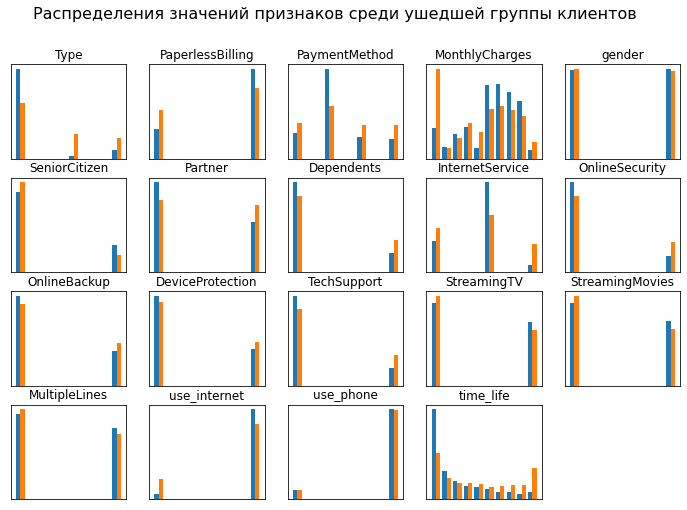

In [29]:
fig = plt.figure(figsize=(12, 8))
fig.suptitle('Распределения значений признаков среди ушедшей группы клиентов', fontsize=16)
for i in range(df.shape[1]):
    col = df.columns[i]
    ax = fig.add_subplot(4, 5, i + 1)
    plt.hist([df[col], data[col]], density=1)
    plt.xticks([])
    plt.yticks([])
    plt.title(col, fontsize=12)

По графикам видно, что распределения среди всех клиентов и ушедших практически одинаковые у признаков *gender*, *OnlineBackup*, *DeviceProtection*, *StreamingTV*, *StreamingMovies*, *MultipleLines* и *use_phone*. Удалим эти признаки, как неинформационные для нашей задачи.

In [30]:
data = data.drop(['gender', 'SeniorCitizen', 'OnlineBackup', 'DeviceProtection', 'StreamingTV', 'StreamingMovies', 'MultipleLines', 'use_phone'], axis=1)

In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Type              7043 non-null   object 
 1   PaperlessBilling  7043 non-null   int64  
 2   PaymentMethod     7043 non-null   object 
 3   MonthlyCharges    7043 non-null   float64
 4   Partner           7043 non-null   int64  
 5   Dependents        7043 non-null   int64  
 6   InternetService   7043 non-null   object 
 7   OnlineSecurity    7043 non-null   int64  
 8   TechSupport       7043 non-null   int64  
 9   use_internet      7043 non-null   int64  
 10  outflow           7043 non-null   int32  
 11  time_life         7043 non-null   int64  
dtypes: float64(1), int32(1), int64(7), object(3)
memory usage: 1007.8+ KB


<a id='fp.9-bullet'></a> 
### 9. Вывод. 

В результате анализа данных и их преобразований осталось кроме целевого ещё 12 признаков. 2 численных признака - **MonthlyCharges** и **time_life**, остальные категориальные, при чём преобразование требуется только по трём признакам - **Type**, **PaymentMethod** и **InternetService**.

Уже на данногм этапе заметно что уходит относительно много тех кто в месяц платил за услуги не много и те кто достаточно малый срок был клиентом компании и очень зависит от того какой тип оплаты у клиента. Данный признак можно рассмотреть отдельно для уточнения:

In [32]:
def plot_show(xlabel='Тип оплаты', ylabel='Количество клиентов', title=''):
    plt.gca().set(xlabel=xlabel, ylabel=ylabel)
    plt.xticks(fontsize=12); plt.yticks(fontsize=12)
    plt.title(title, fontsize=16)
    plt.show()

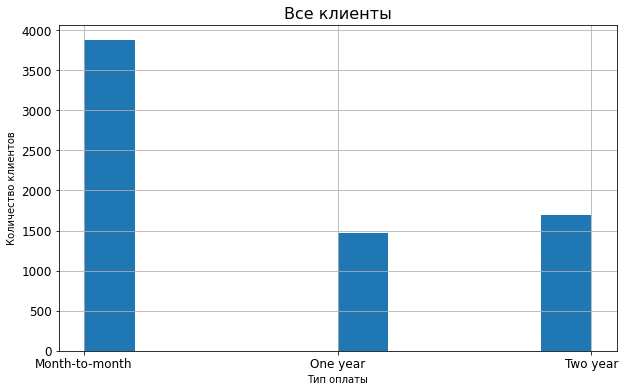

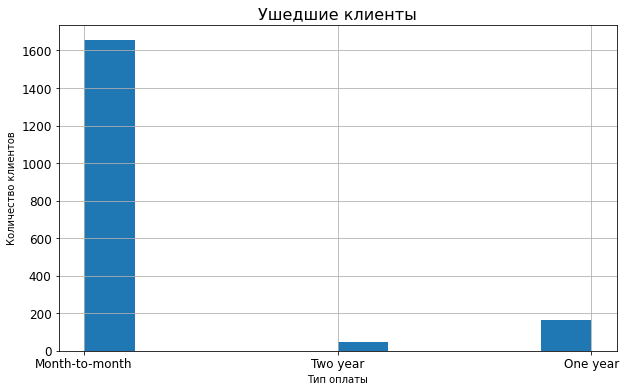

In [33]:
data.Type.hist(grid=True, figsize=(10, 6))
plot_show(title='Все клиенты')

df.Type.hist(grid=True, figsize=(10, 6))
plot_show(title='Ушедшие клиенты')

Видно что те кто платит помесячно уходят веселее, чем те кто платит за более длительный срок.

## Часть 3. Подбор и обучение оптимальных моделей. 

#### Классы и функции, необходимые для решения задачи.

In [34]:
class ab_ProgressBar():
    
    def __init__(self, max=0):
        self.max_count = max
        self.spinner_state = 0
        self.progress = 0
        self.start_time = time.perf_counter()
        self.progress_step = 100 / self.max_count
        self.draw()
    
    def get_diff_time(self, t):
        return int(t // 3600), int((t // 60) % 60), int(t % 60)
    
    def get_time_string(self):
        return '{0[0]:02}:{0[1]:02}:{0[2]:02}'.format(self.get_diff_time(time.perf_counter() - self.start_time))
    
    def get_left_time_string(self):
        cur_time = time.perf_counter() - self.start_time
        try:
            return '{0[0]:02}:{0[1]:02}:{0[2]:02}'.format(self.get_diff_time(max(0, cur_time * (100 - self.progress) / self.progress)))
        except:
            return ' - '
            
    def get_fill_progress(self):
        count = int(self.progress / 2)
        return '.' * count + ' ' * int(50 - count)
    
    def draw(self):
        print(f'[{self.progress:.1f}%][time: {self.get_time_string()}][{self.get_fill_progress()}][time left: {self.get_left_time_string()}]', end='\r')
 
    def increment(self, count=1):
        self.draw()
        self.progress += self.progress_step * count
    
    def stop(self):
        print()

Функция для выделения целевого признака и разобивки выборки на тестовую,  и тренировочную

In [35]:
class DataSplitter():
    
    def __init__(self, random_state=RANDOM_STATE):
        self.random_state = random_state
    
    def split_target(self, df, target_column, need_drop_target):
        result = {'X': df, 'y': df[target_column]}
        if need_drop_target:
            result['X'] = result['X'].drop([target_column], axis=1)
        return result
    
    def split(self, df, target_column, 
              part=None, test_size=0.25, valid_size=0.25, 
              shuffle=True, need_drop_target=True, train_with_valid=False):
        train_test = train_test_split(df, test_size=test_size, 
                                      shuffle=shuffle, random_state=self.random_state)
        train_valid = train_test_split(train_test[0], test_size=valid_size, 
                                       shuffle=shuffle, random_state=self.random_state)
        split_data = {}
        if train_with_valid:
            split_data['train'] = self.split_target(train_test[0], target_column, need_drop_target)
        else:
            split_data['train'] = self.split_target(train_valid[0], target_column, need_drop_target)
        split_data['test'] = self.split_target(train_test[1], target_column, need_drop_target)
        split_data['valid'] = self.split_target(train_valid[1], target_column, need_drop_target)
        try:
            self.X = split_data[part]['X']
            self.y = split_data[part]['y']
        except:
            self.X = {'train': split_data['train']['X'], 'test': split_data['test']['X'], 'valid': split_data['valid']['X']}
            self.y = {'train': split_data['train']['y'], 'test': split_data['test']['y'], 'valid': split_data['valid']['y']}

Функция для балансировки одним из методов: *Upsampling* либо *Downsampling* 

In [36]:
def balance(features, target, technique='Upsampling', factor=None):
    features_zeros, features_ones = features[target == 0], features[target == 1]
    target_zeros, target_ones = target[target == 0], target[target == 1]
    if factor == None:
        factor = round(target[target == 0].count() / target[target == 1].count())
    if technique == 'Upsampling':
        new_features = pd.concat([features_zeros] + [features_ones] * factor)
        new_target = pd.concat([target_zeros] + [target_ones] * factor)
    elif technique == 'Downsampling':
        new_features = pd.concat([features_zeros.sample(frac=1/factor, random_state=RANDOM_STATE)] + [features_ones])
        new_target = pd.concat([target_zeros.sample(frac=1/factor, random_state=RANDOM_STATE)] + [target_ones])
    else:
        return features, target
    
    return shuffle(new_features, new_target, random_state=RANDOM_STATE)    

Функция для упрощения получения тренировочной или тестовой выборки с включением балансировки для тренировочной выборки.

In [37]:
def get_train(df):
    split_data = DataSplitter()
    split_data.split(df, target_column='outflow', part='train', train_with_valid=True)
    split_data.X, split_data.y = balance(split_data.X, split_data.y)        
    return split_data

In [38]:
def get_test(df):
    split_data = DataSplitter()
    split_data.split(df, target_column='outflow', part='test', train_with_valid=True)
    return split_data

Выделим в список категориальные признаки, которые необходимо преобразовывать в численные:

In [39]:
categorial = ['Type', 'PaymentMethod', 'InternetService']

Выделим в список численных признаков, которые необходимо стандартизировать:

In [40]:
numerical = ['MonthlyCharges', 'time_life']

Так как данных не так уж и много, то для обоих моделей будем использовать кросс валидацию с делением на 3 части, при этом каждая часть, которая будет выделяться на валидацию будет примерно соответствовать размеру тестовой выборки.

<a id='fp.10-bullet'></a> 
### 10. Обучение модели логистической регрессии.

Для логистической регрессии следует провести балансировку методом *Upsampling*, преобразовать категориальные признаки методом *OHE* для признаков *Type*, *PaymentMethod* и *InternetService*, а так же стандартизировать численные признаки *MonthlyCharges* и *time_life*.

Функция для создания пайплайна для логистической регрессии.

In [41]:
def GetLGPipeline():
    scaler = StandardScaler() 
    numerical_selector = FunctionTransformer(lambda X: X[numerical])
    numerical_preprocessor = Pipeline([('numerical_selector', numerical_selector), ('scaling', scaler)])

    ohe = OneHotEncoder(sparse=False, handle_unknown='error', drop='first')
    dummy_selector = FunctionTransformer(lambda X: X[categorial])
    dummy_preprocessor = Pipeline([('dummy_selector', dummy_selector), ("ohe", ohe)])

    feature_union = FeatureUnion([('numerical_preprocessor', numerical_preprocessor), ('dummy_preprocessor', dummy_preprocessor)])
    pipeline = Pipeline([('preprocessing', feature_union), ('classifier', LogisticRegression())])
    
    return pipeline

Функция для обучения логистической регрессии на кросс-валидации с использованием балансировки методом *Upsampling*, преобразованием категориальных признаков методом OHE и стандартизции численных признаков.

Возвращать функция будет метрику roc_auc

In [42]:
def best_score_LogisticRegression(df, cv=3):
    split_data = get_train(df)
    pipeline = GetLGPipeline()
    return sum(cross_val_score(pipeline, split_data.X, split_data.y, cv=cv, scoring='roc_auc')) / cv

In [43]:
print('Результат логистической регрессии на кросс валидации:')
display(best_score_LogisticRegression(data))

Результат логистической регрессии на кросс валидации:


0.8378976489337022

<a id='fp.11-bullet'></a> 
### 11. Подбор параметров и обучение модели градиентного бустинга.

Для градиентного бустинга следует провести балансировку методом *Upsampling*.

Возвращать функция будет набор подобранных параметров и получившуюся метрику, а так же feature_importances.

In [44]:
def best_score_CatBoostClassifier(df, params, cv=3):
    
    progress_bar = ab_ProgressBar(cv * len(params['max_depth']) * len(params['n_estimators']))

    class ab_CatBoostClassifier(CatBoostClassifier):
        def fit(self, X, y):
            progress_bar.increment()
            return super().fit(X, y)

    result = {}
    split_data = get_train(df)
    grid = GridSearchCV(
        ab_CatBoostClassifier(cat_features=categorial, 
                              random_state=RANDOM_STATE, logging_level='Silent', 
                              loss_function="Logloss", learning_rate=0.5), 
        cv=cv, param_grid=params, scoring='roc_auc', refit=True)
    
    grid.fit(split_data.X, split_data.y)

    result = {
        'max_depth': grid.best_params_['max_depth'],
        'n_estimators': grid.best_params_['n_estimators'],
        'roc_auc_score': grid.best_score_,
        'feature_importances': grid.best_estimator_.feature_importances_
    }
    progress_bar.stop()
    return result

Для бустинга будем подбирать параметры *max_depth* и *n_estimators*. Чтобы не переобучать модель, выделим для глубины значения от 1 до 10, а количество деревьев особо ограничевать не будем.

In [45]:
parameters = {'max_depth': range(1, 11, 2), 'n_estimators': range(50, 151, 40)}
best_params = best_score_CatBoostClassifier(data, params=parameters)

[100.0%][time: 00:01:51][..................................................][time left: 00:00:00]


In [46]:
print('Результат градиентного бустинга и подобранные параметры:')
display(best_params)

Результат градиентного бустинга и подобранные параметры:


{'max_depth': 9,
 'n_estimators': 130,
 'roc_auc_score': 0.9387596272317644,
 'feature_importances': array([ 6.97218507,  5.86541387,  8.03433147, 18.86736446,  3.50302025,
         3.9205851 ,  4.5928108 ,  4.68439774,  3.83223076,  0.83955003,
        38.88811045])}

<a id='fp.12-bullet'></a> 
### 12. Вывод.

Логистическая регрессия на кросс-валидации показала не плохой результат для метрики **roc-auc = 0.838**, но возможность подобрать параметры для градиентного бустинга позволило этой модели дать гораздо лучший результат **roc-auc = 0.939**. В следующей части проекта проверим на тестовой выборке и ту и другую модель, при чём для бустинга исключим признаки значимость которых меньше 5.

## Часть 4. Проверка моделей на тестовой выборке. 

<a id='fp.13-bullet'></a> 
### 13. Проверка наилучшей модели логистической регрессии на тестовой выборке. 

In [47]:
def test_LogisticRegression(df):
    split_data = get_train(df)
    pipeline = GetLGPipeline()
    pipeline.fit(split_data.X, split_data.y)
    split_data = get_test(df)
    roc_auc = roc_auc_score(split_data.y, pipeline.predict_proba(split_data.X)[:, 1])
    accuracy = accuracy_score(split_data.y, pipeline.predict(split_data.X))
    return roc_auc, accuracy

In [48]:
print('Результат логистической регрессии на тестовой выборке:')
roc_auc, accuracy = test_LogisticRegression(data)
print('roc_auc_score = ', roc_auc)
print('accuracy_score = ', accuracy)

Результат логистической регрессии на тестовой выборке:
roc_auc_score =  0.8296909799554566
accuracy_score =  0.7194775695627484


<a id='fp.14-bullet'></a> 
### 14. Проверка наилучшей модели лградиентного бустинга на тестовой выборке. 

In [49]:
def test_CatBoostClassifier(df, best_params):
    split_data = get_train(df)
    imp_columns = pd.DataFrame({'feature': list(split_data.X.columns), 'importance': best_params['feature_importances']})
    imp_columns = imp_columns.sort_values('importance', ascending = False).reset_index(drop=True)
    imp_columns = imp_columns[imp_columns.importance > 5]

    cat_features = [feat for feat in imp_columns.feature if feat in categorial]
    model = CatBoostClassifier(cat_features=categorial, 
                               random_state=RANDOM_STATE, 
                               logging_level='Silent', 
                               loss_function="Logloss", 
                               learning_rate=0.5, 
                               max_depth=best_params['max_depth'], 
                               n_estimators=best_params['n_estimators']) 
    
    
    model.fit(split_data.X, split_data.y)
    split_data = get_test(df)
    roc_auc = roc_auc_score(split_data.y, model.predict_proba(split_data.X)[:, 1])
    accuracy = accuracy_score(split_data.y, model.predict(split_data.X))
    return roc_auc, accuracy

In [50]:
print('Результат шрадиентного бустинга на тестовой выборке:')
roc_auc, accuracy = test_CatBoostClassifier(data, best_params)
print('roc_auc_score =', roc_auc)
print('accuracy_score =', accuracy)

Результат шрадиентного бустинга на тестовой выборке:
roc_auc_score = 0.8906810187951546
accuracy_score = 0.8154457694491766


<a id='fp.15-bullet'></a> 
## Часть 5. Общий вывод. 

В результате проведённого исследования поставленной задаче по прогнозу оттока елиентов у оператора связи были изучены предоставленные компанией данные. На основании анализа были выведены нужные признаки для обучения модели, которая сможет прогнозировать отток клиентов. Были созданы производные признаки и выброшены признаки, которые оказались коллинеарными с другими, а так же те, где распределение ушедших клиентов и всего набора совпадают в относительных значениях. 

Для решения задачи прогнозирования были выбраны 2 наиболее быстрые модели - линейная регрессия и градиентный бустинг. Для градиентного бустинга были подобраны параметры на тренировочной выборки с использованием кросс-валидации. В результате градиентный бустинг предварительно показал отличный результат на метрике roc_auc = 0.939, логистическая регрессия показала более скромный, но тоже не плохой результат roc-auc = 0.838. Такие результаты позволили взять эти модели для проверки на тестовой выборки для оценки их качества и дальнейшем решении об их внедрении.

В результате проверки моделей на тестовой выборке, у нас получились отличные результаты, а именно:
**Метрика roc_auc у логистической регрессии составила почти 0,83**
**Метрика accuracy у логистической регресси составила почти 0,72**
**Метрика roc_auc у градиентного бустинга составила более 0,89**
**Метрика accuracy у градиентного бустинга составила почти 0,82**

Близкие значения на кросс-валидации и тестовой выборке у линейной регрессии означает что в данной модели минимальная переобученность, что может свидетельствовать о её стабильности на длительном сроке использования.
У градиентного бустинга заметна небольшая переобученность, но высокий результат метрик даёт ему заметную фору для практического применения.

Так же, в процессе обучения модели градиентного бустинга мы получили таблицу значимости различных признаков в предсказании:

In [51]:
display(pd.DataFrame({'feature': list(data.drop('outflow', axis=1).columns), 
                      'importance': best_params['feature_importances']}).
        sort_values('importance', ascending = False).reset_index(drop=True))

,feature,importance
0,time_life,38.888110
1,MonthlyCharges,18.867364
2,PaymentMethod,8.034331
3,Type,6.972185
4,PaperlessBilling,5.865414
5,OnlineSecurity,4.684398
6,InternetService,4.592811
7,Dependents,3.920585
8,TechSupport,3.832231
9,Partner,3.503020


Данная таблица поможет понять отделу маркетинга какие характеристики из набора данных наиболее влияют на решение клиентов остаться или уйти.